https://www.opengeosys.org/ <br>
More examples of small deformation at: https://www.opengeosys.org/docs/benchmarks/small-deformations/

# The equations of linear elasticity$^1$



The equations governing small elastic deformations of a body $\Omega$ can be written in isotropic elastic conditions as: \
$$
\begin{align}
-\nabla\cdot\sigma\left(u\right)&=f \:\:\:\text{in}\:\:\: \Omega \\
\sigma\left(u\right)&=\lambda \text{tr}\left(\epsilon\left(u\right)\right)I \ +\ 2\mu\epsilon\left(u\right) \\
\epsilon\left(u\right)&=\frac{1}{2}\left(\nabla u\ +\ \left(\nabla u\right)^T \right)
\end{align}
$$

Where,\
$\sigma$ the stress tensor;\
$f$ the body force per unit volume;\
$\lambda$ and $\mu$ are Lamé’s elasticity parameters for the material in $\Omega$\
$I$ is the identity tensor;\
$\text{tr}$ the trace operator on a tensor;\
$\epsilon$ the symmetric strain tensor (symmetric gradient);\
$u$ the displacement vector field.\
\
By inserting $\sigma\left(u\right)$ into $\sigma$ we obtain:
\
$$\sigma\left(u\right)= \lambda\left(\nabla\cdot u\right) I+\ \mu\left(\nabla u\ +\ \left(\nabla u\right)^T \right)$$

## Variational Formulation



The variational formulation of the PDE consists of forming the inner product of the PDE $\sigma\left(u\right)$ with a *vector*
test function $v\ \in \ \check{V}$, where $\check{V}$ is a vector-valued test function space, and integrating over the domain $\Omega$
:
\
$$-\int_\Omega\left(\nabla\cdot\sigma\right)\cdot v\,\mathrm{d}x=\int_\Omega f\cdot  v\,\mathrm{d}x.$$ \
$\nabla\cdot\sigma$ contains second-order derivatives of $u$ that is unknown, integration by parts is handy.\
$$-\int_\Omega\left(\nabla\cdot\sigma\right)\cdot v\,\mathrm{d}x= \int_\Omega\sigma : \nabla v\,\mathrm{d}x- \int_{\partial\Omega} \left(\sigma\cdot n\right)\cdot v\,\mathrm{d}s,$$
\
where,
$:$ inner product between tensors (summed pairwise product of all elements); \
$n$ the outward unit normal at the boundary; \
$\sigma\cdot n$ *traction* or stress vector at the boundary, and often prescribed as a boundary condition.
Here assumed prescribed on a part $\partial\Omega_T$ of the boundary as $\sigma\cdot n=T$  \ 
On the remaining part of the boundary, is assumed that the value of the displacement is given as Dirichlet condition (and hence the boundary integral on those boundaries are 0). Therefore,resulting:
\
$$\int_\Omega\sigma: \nabla v\,\mathrm{d}x= \int_\Omega f\cdot v\,\mathrm{d}x + \int_{\partial\Omega_T} T\cdot v \,\mathrm{d}s.$$
\
Inserting $\sigma$ its representation with $u$, the variational formulation: Find $u\in\\check{V},$ such that
\
$$a\left( u,v\right)= L\left(v\right) \qquad \forall v \in \check{V}, $$
\
where
$$
\begin{align}
a\left( u,v\right)&=\int_\Omega \sigma\left(u\right):\nabla v \,\mathrm{d}x \\
\sigma\left(u\right)&= \lambda\left(\nabla\cdot u\right) I + \mu\left(\nabla u + \left(\nabla u\right)^T\right),\\
L\left(v\right)&=\int_\Omega f\cdot v \,\mathrm{d}x + \int_{\partial\Omega_T} T\cdot v \,\mathrm{d}s.
\end{align}
$$                                                                                                                       



The inner product of a symmetric tensor $A$ and an anti-symmetric tensor $B$
vanishes. By expressing $\nabla v$ as a sum of its symmetric and anti-symmetric parts, only the symmetric part will survive in the product
 $\sigma : \nabla\ v$ since $\sigma$ is a symmetric tensor. Consequently, replacing $\nabla v$by the symmetric gradient $\epsilon\left( v\right)$ gives rise to a slightly different variational form/
$$a\left( u,v\right)=\int_\Omega \sigma\left(u\right):\epsilon\left( v\right) \,\mathrm{d}x,$$\
where $\epsilon\left( v\right)$ is the symmetric part of $\nabla v$:
\
$$\epsilon\left(v\right)= \frac{1}{2}\left(\nabla v + \left(\nabla v \right)^T \right)$$
\
\
Reference\
(1)  Logg, A. & Petter, H. (2025). *The equations of linear elasticity*. https://jsdokken.com/dolfinx-tutorial/chapter2/linearelasticity.html 



# Small Deformation and LIE examples

In [1]:
import os
import shutil
from pathlib import Path

import pyvista as pv
import ogstools as ot
import ogstools.variables as ov

import matplotlib.pyplot as plt
import numpy as np

from meshing import create_rectangle_mesh, create_cube_mesh, create_rectangle_frac_mesh

In [2]:
#verifying path origin
os.getcwd()

'D:\\RUB-Aktiväten\\OGS\\github\\Getting_started_OGS'

# OpenGeoSys (OGS)

[![Website](https://img.shields.io/badge/Website-opengeosys.org-brightgreen.svg)](https://www.opengeosys.org)
[![License](https://img.shields.io/badge/License-See%20Imprint-blue.svg)](https://www.opengeosys.org/imprint/)
[![DOI](https://zenodo.org/badge/doi/10.5281/zenodo.591265.svg)](https://doi.org/10.5281/zenodo.591265)

### Installation & Deployment


| Package | Platform | Installation | Version |
|---------|----------|--------------|---------|
| **OpenGeoSys** | | | |
| [![PyPI](https://img.shields.io/pypi/v/ogs.svg)](https://pypi.org/project/ogs) | Cross-platform | `pip install ogs` | [![Python](https://img.shields.io/pypi/pyversions/ogs.svg)](https://pypi.org/project/ogs) |
| [![Conda](https://img.shields.io/conda/vn/conda-forge/ogs.svg)](https://anaconda.org/conda-forge/ogs) | Cross-platform | `conda install -c conda-forge ogs` | - |
| [![Windows](https://img.shields.io/badge/Windows-EXE-blue.svg)](https://www.opengeosys.org/releases/) | Windows | Download installer | - |
| **OGSTools** | | | |
| [![PyPI](https://img.shields.io/pypi/v/ogstools.svg)](https://pypi.org/project/ogstools) | Cross-platform | `pip install ogstools` | [![Python](https://img.shields.io/pypi/pyversions/ogstools.svg)](https://pypi.org/project/ogstools) |
| [![Conda](https://img.shields.io/conda/vn/conda-forge/ogstools.svg)](https://anaconda.org/conda-forge/ogstools) | Cross-platform | `conda install -c conda-forge ogstools` | - |



###  Source Code
[![GitLab Repo](https://img.shields.io/badge/Source-GitLab-blueviolet.svg)](https://gitlab.opengeosys.org/ogs/ogs)

### Build Configuration
[![Basic Build](https://img.shields.io/badge/Build_Configuration-Guide-orange)](https://www.opengeosys.org/docs/devguide/getting-started/build-configuration/)
[![MPI/PETSc Build](https://img.shields.io/badge/MPI_PETSc_Configuration-Guide-blue)](https://www.opengeosys.org/docs/devguide/getting-started/build-configuration_for_mpi_petsc/configure_for_mpi_and_petsc/)

###  Documentation & Learning

| Resource | Link |
|----------|------|
| Quick Start | [![5 Min Tutorial](https://img.shields.io/badge/OGS–5_Min_Tutorial-green.svg)](https://www.opengeosys.org/docs/userguide/basics/5-mins-ogs/) |
| Project Files | [![Project File](https://img.shields.io/badge/Project–File-prj-blue.svg)](https://www.opengeosys.org/docs/userguide/basics/project-file/) |
| Benchmarks | [![Benchmarks](https://img.shields.io/badge/Benchmarks-Gallery-lightgrey.svg)](https://www.opengeosys.org/docs/benchmarks/) |

### Developer Documentation
[![Doxygen Docs](https://img.shields.io/badge/API-Doxygen%20Documentation-9cf.svg)](https://doxygen.opengeosys.org)

###  External Tools
| Package | Installation | Documentation |
|---------|--------------|---------------|
| **GMSH** | [![GMSH PyPI](https://img.shields.io/badge/GMSH-PyPI%20Package-blueviolet.svg)](https://pypi.org/project/gmsh) (`pip install gmsh`) | [![GMSH Docs](https://img.shields.io/badge/GMSH-Documentation-blue.svg)](https://gmsh.info/dev/doc/texinfo/gmsh.pdf) |
| **PyVista** | [![PyVista PyPI](https://img.shields.io/badge/PyVista-PyPI%20Package-blueviolet.svg)](https://pypi.org/project/pyvista) (`pip install pyvista`) | [![PyVista Docs](https://img.shields.io/badge/PyVista-Documentation-blue.svg)](https://docs.pyvista.org/index.html) |

###  Community
[![Forum](https://img.shields.io/badge/Discourse-Forum-blue.svg)](https://discourse.opengeosys.org)
[![Issues](https://img.shields.io/badge/GitLab-Issues-blueviolet.svg)](https://gitlab.opengeosys.org/ogs/ogs/-/issues)
[![Mattermost](https://img.shields.io/badge/Chat-Mattermost-purple.svg)](https://mattermost.opengeosys.org/ogs-devs)



## Path

In [3]:
OGS_PATH = None

In [4]:
if OGS_PATH is not None:
    os.environ["OGS_BIN_PATH"] = OGS_PATH
OUT_DIR = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
MESH_DIR = OUT_DIR / "mesh"
shutil.rmtree(OUT_DIR, ignore_errors=True)
MESH_DIR.mkdir(parents=True, exist_ok=True)

## 2D mesh generation

In [5]:
MSH_FILE = MESH_DIR / "rectangle_2d.msh"

create_rectangle_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0)

meshes = ot.meshes_from_gmsh(MSH_FILE, log=False)
for name, mesh in meshes.items():
    vtu_path = MESH_DIR / f"{name}.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")



Saved _out\mesh\domain.vtu
Saved _out\mesh\physical_group_top.vtu
Saved _out\mesh\physical_group_left.vtu
Saved _out\mesh\physical_group_bottom.vtu
Saved _out\mesh\physical_group_right.vtu
Saved _out\mesh\physical_group_domain.vtu


## 2D mesh Plot 

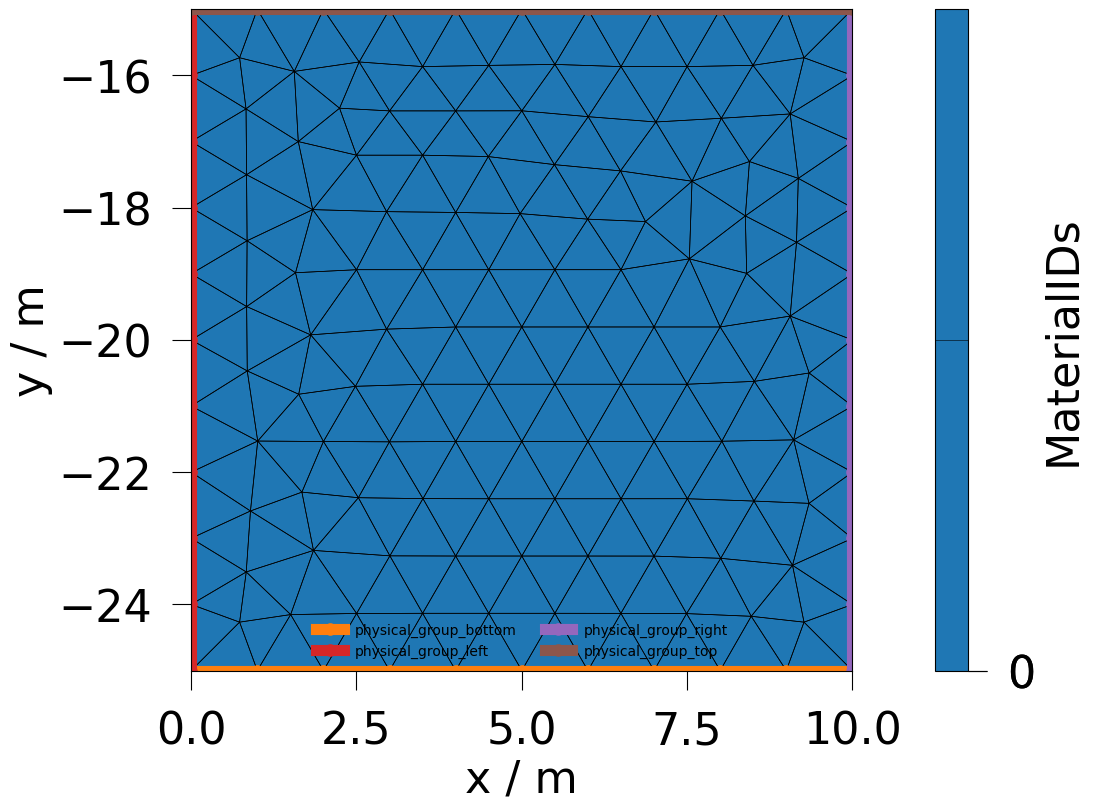

In [44]:
fig = meshes["domain"].plot_contourf(
    "MaterialIDs",
    figsize=(12, 8),
    dpi=100,
    cmap="tab20",
    alpha=0.3,
    linewidth=0,
)
ax = fig.axes[0]
for i, (name, mesh) in enumerate(sorted(meshes.items())):
    if mesh.area:  
        continue
    ls, marker = ("-", "") if "boundary" in name else ("-", "o")
    ot.plot.line(
        mesh,
        ax=ax,
        color=f"C{i}",
        lw=2,
        ls=ls,
        marker=marker,
        markersize=8,
        label=name,
    )
ax.set_aspect("equal")
ax.legend(ncol=2, fontsize=10, frameon=False)
plt.show()

## 2D OGS and Python plot results

In [7]:
#reordering mesh (for assuring correct mesh configuration)
!NodeReordering -o ./_out/mesh/domain.vtu -i ./_out/mesh/domain.vtu 

[2025-08-06 14:39:38.281] [ogs] [info] Reordering nodes... 
[2025-08-06 14:39:38.281] [ogs] [info] Corrected 0 elements.
[2025-08-06 14:39:38.283] [ogs] [info] VTU file written.


In [8]:
!ogs SD_init.prj -m ./_out/mesh -o ./_out/

info: This is OpenGeoSys-6 version 6.5.5.
info: OGS started on 2025-08-06 14:39:38+0200.
info: Eigen use 16 threads
info: Reading project file SD_init.prj.
info: readRasters ...
info: readRasters done
info: ConstantParameter: E
info: ConstantParameter: nu
info: ConstantParameter: displacement0
info: ConstantParameter: zero
info: ConstantParameter: T0
info: FunctionParameter: sigma0
info: FunctionParameter: geo_stress
info: No source terms for process variable 'displacement' found.
info: Threads used for ParallelVectorMatrixAssembler: 1. This is the default when OGS_ASM_THREADS environment variable is not set.
info: SmallDeformation process initializeSubmeshOutput().
info: Initialize processes.
info: Time step #0 started. Time: 0. Step size: 0.
info: [time] Output of timestep 0 took 0.0153652 s.
info: Time step #0 took 0.0177288 s.
info: OpenGeoSys is now initialized.
info: OGS started on 2025-08-06 14:39:38+0200.
info: Solve processes.
info: Time step #1 started. Time: 10. Step size: 1

In [9]:
#Loading last timestep mesh results
ms = ot.MeshSeries(f'{OUT_DIR}/init.pvd')
mesh = ms[-1]

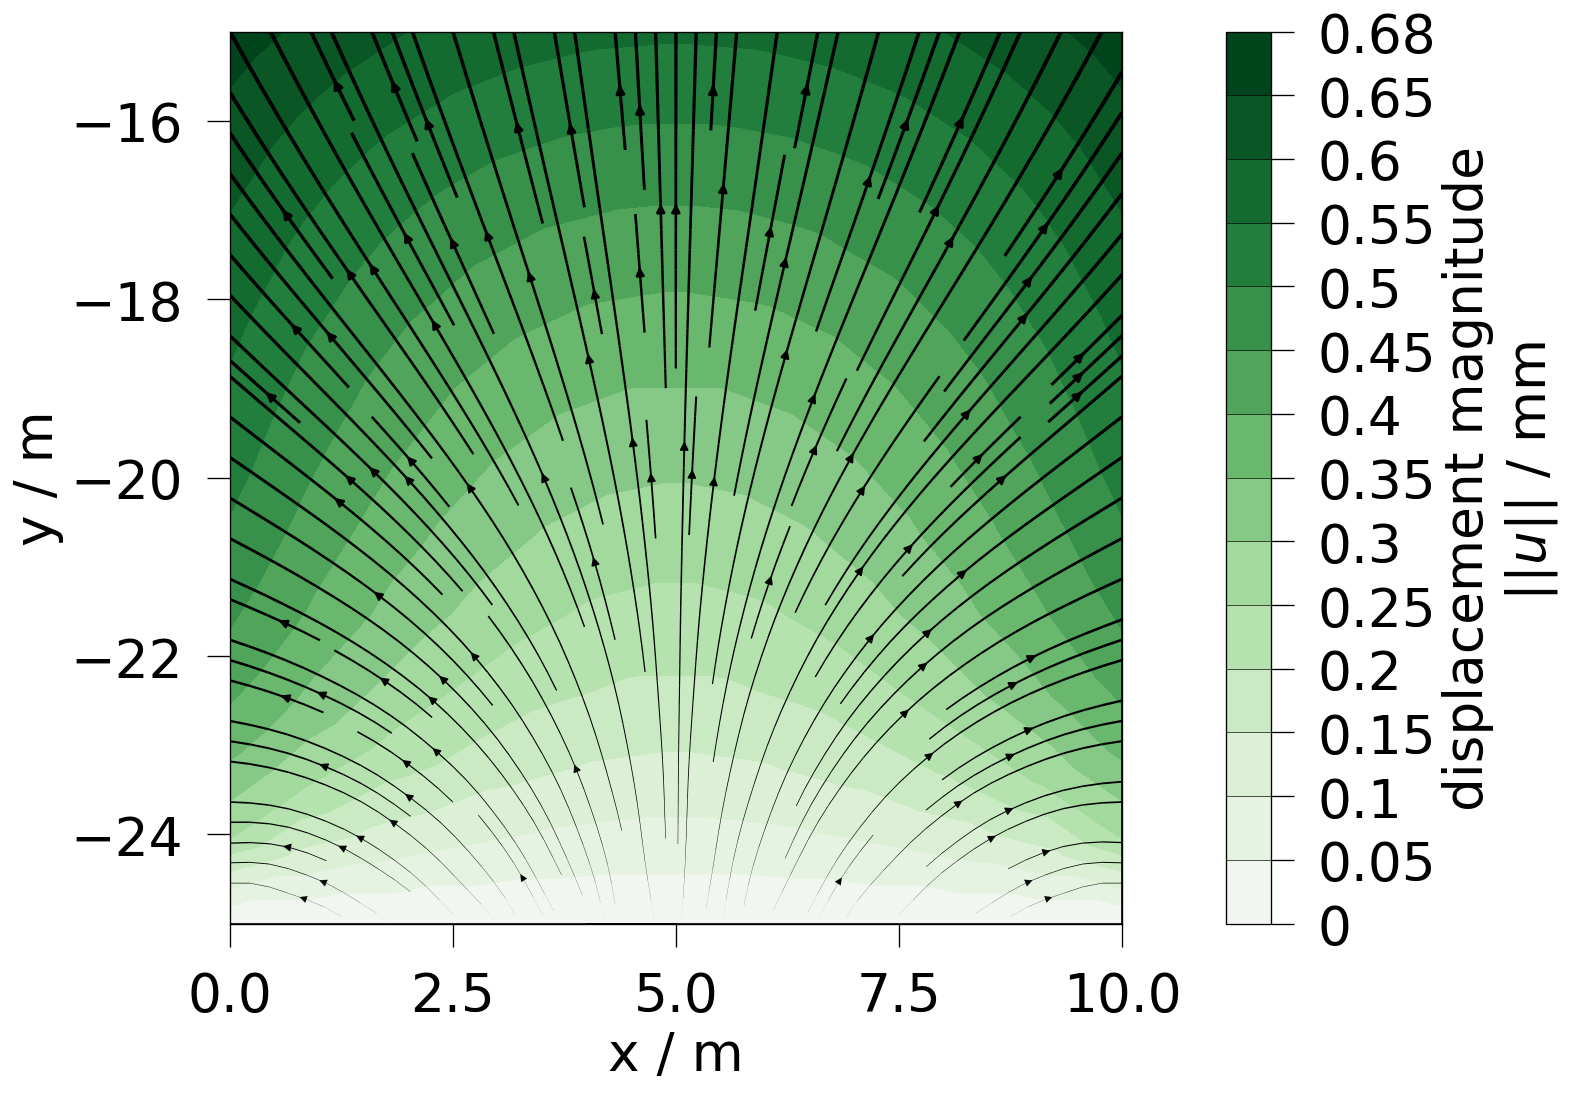

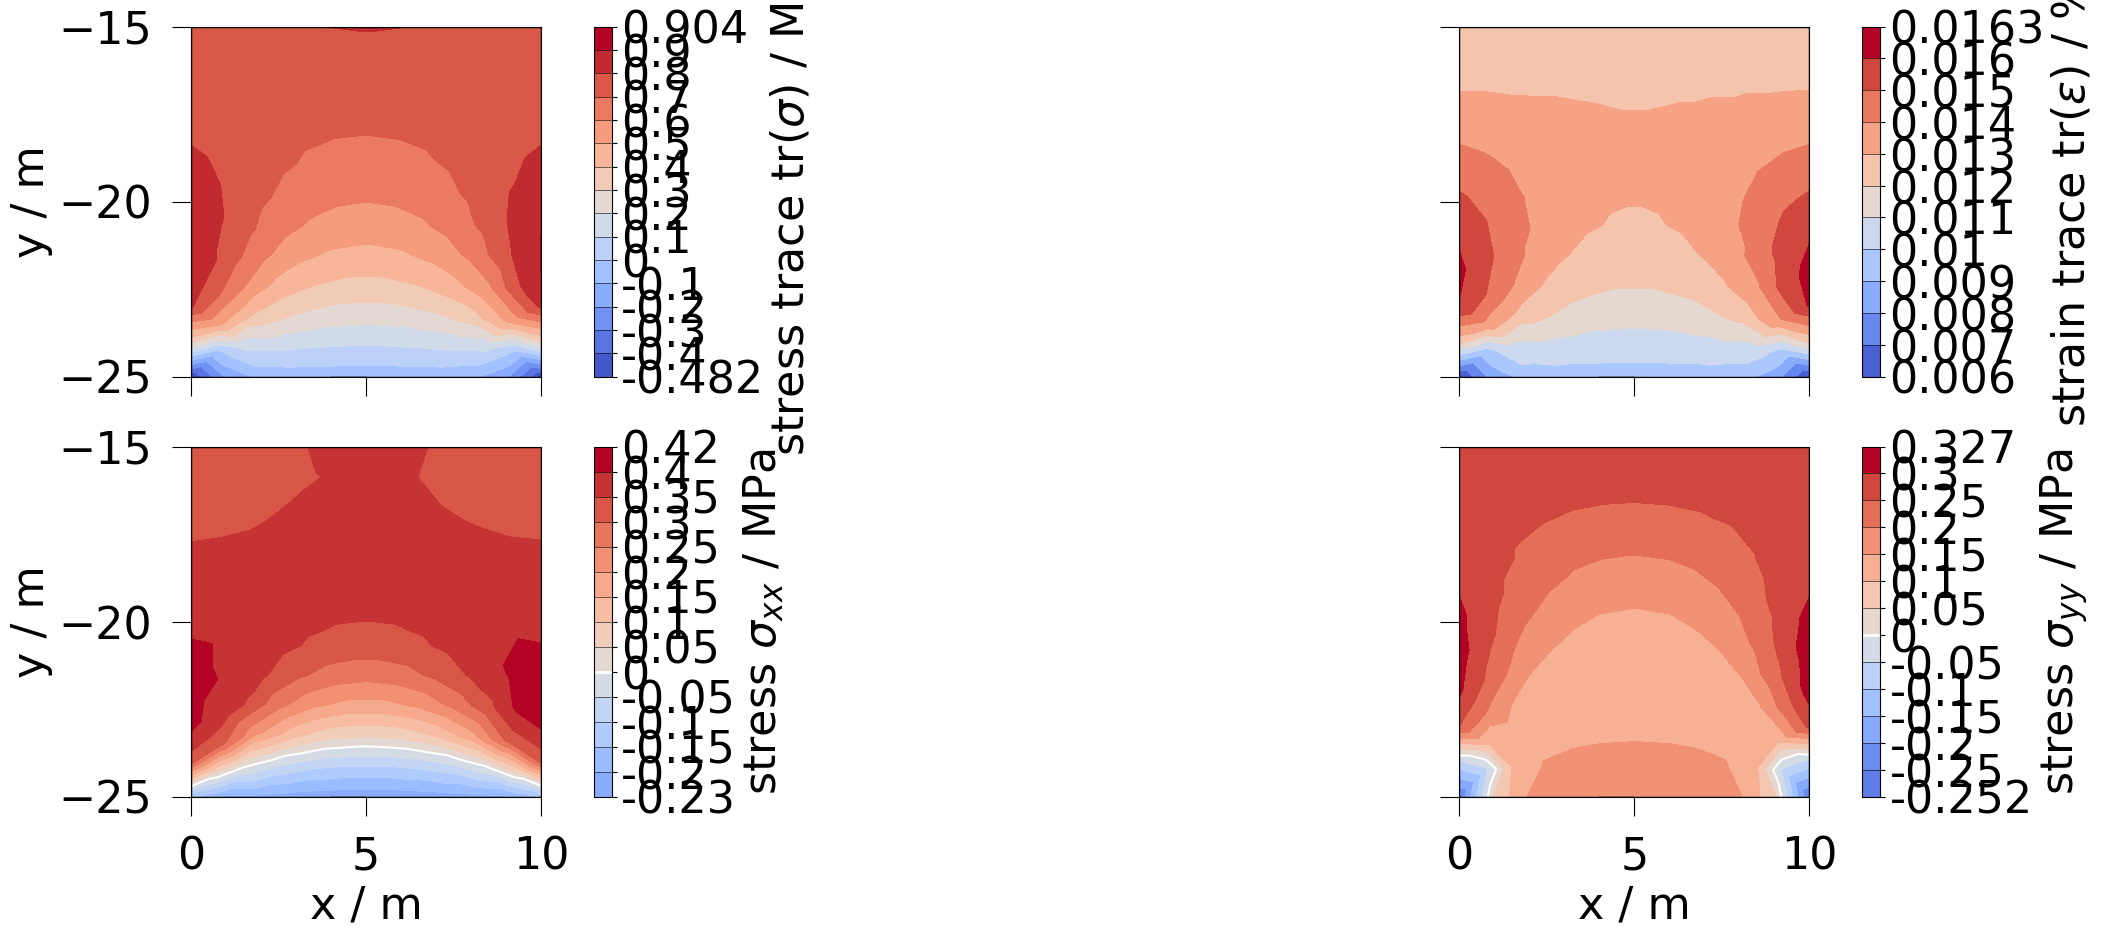

In [10]:
#graph in python

displacement = ot.variables.displacement.replace(output_unit="mm")
mesh.plot_contourf(displacement)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[30, 10], sharex=True, sharey=True)

mesh.plot_contourf(ot.variables.stress.trace, fig, axs[0,0])
mesh.plot_contourf(ot.variables.strain.trace, fig, axs[0,1])
mesh.plot_contourf(ot.variables.stress["xx"], fig, axs[1,0])
mesh.plot_contourf(ot.variables.stress["yy"], fig, axs[1,1])

plt.show()
fig.tight_layout()


## 2D Fracture and Internal modified ID

In [11]:
MSH_FILE = MESH_DIR / "rectangle_frac_2d.msh"


create_rectangle_frac_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0,
        mode="BC")
meshes_bc = ot.meshes_from_gmsh(MSH_FILE,  dim=[0,1], log=False) 
for name, mesh in meshes_bc.items():
    vtu_path = MESH_DIR / f"{name}_fracture.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")
    

create_rectangle_frac_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0,
        mode="domain")
meshes_m= ot.meshes_from_gmsh(MSH_FILE,  dim=[1,2], log=False)
for name, mesh in meshes_m.items():
    vtu_path = MESH_DIR / f"{name}_fracture.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")


Saved _out\mesh\domain_fracture.vtu
Saved _out\mesh\physical_group_p4_fracture.vtu
Saved _out\mesh\physical_group_p3_fracture.vtu
Saved _out\mesh\physical_group_top_fracture.vtu
Saved _out\mesh\physical_group_bottom_fracture.vtu
Saved _out\mesh\physical_group_right_fracture.vtu
Saved _out\mesh\physical_group_left_fracture.vtu

Saved _out\mesh\domain_fracture.vtu
Saved _out\mesh\physical_group_fracture_fracture.vtu
Saved _out\mesh\physical_group_top_surf_fracture.vtu
Saved _out\mesh\physical_group_bot_surf_fracture.vtu


## 2D Plot of fracture and Modified material ID

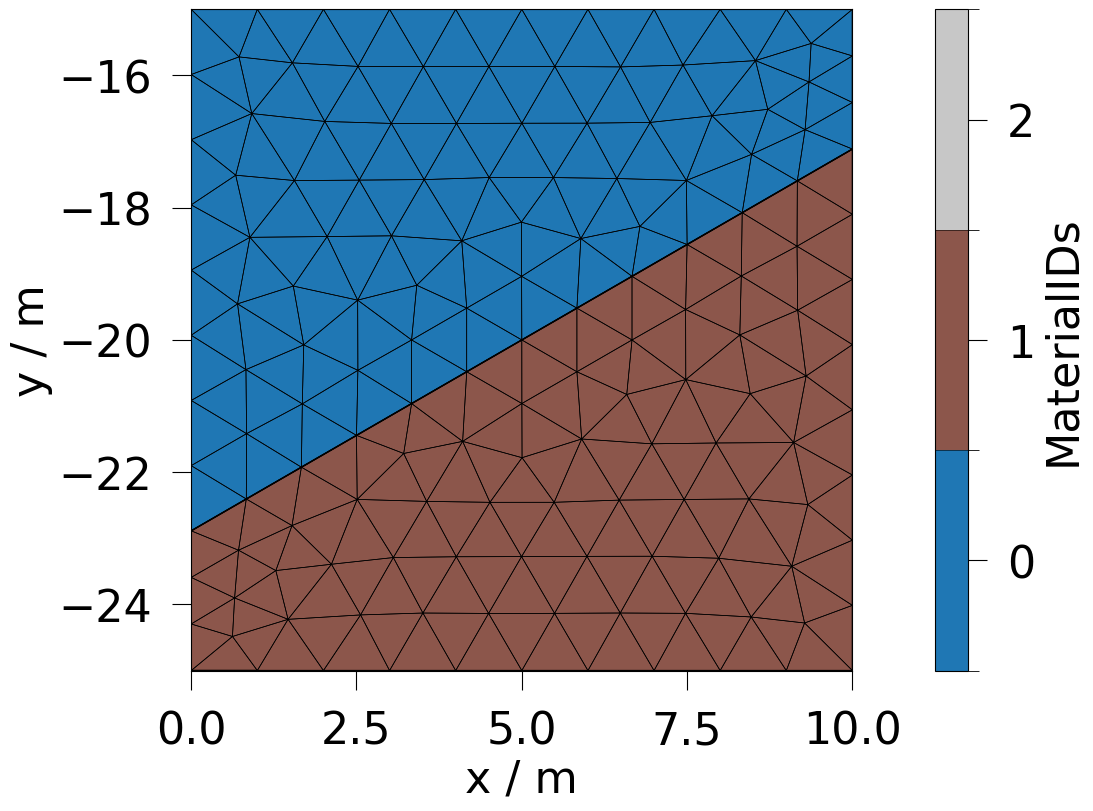

In [12]:
#Domain graph
fig = meshes_m["domain"].plot_contourf(
    "MaterialIDs",
    figsize=(12, 8),
    dpi=100,
    cmap="tab20",
    alpha=0.3,
    linewidth=0,
)
plt.show()


## 2D Fracture OGS and Python plot results

In [13]:
#reordering mesh and setting ID of material orderly: 0,1,2
!NodeReordering -o ./_out/mesh/domain_fracture.vtu -i ./_out/mesh/domain_fracture.vtu 
!identifySubdomains -f -m ./_out/mesh/domain_fracture.vtu --  ./_out/mesh/physical_group_top_fracture.vtu ./_out/mesh/physical_group_bottom_fracture.vtu ./_out/mesh/physical_group_p4_fracture.vtu

[2025-08-06 14:39:43.512] [ogs] [info] Reordering nodes... 
[2025-08-06 14:39:43.512] [ogs] [info] Corrected 0 elements.
[2025-08-06 14:39:43.514] [ogs] [info] VTU file written.
[2025-08-06 14:39:43.832] [ogs] [info] Mesh reading time: 0.0101772 s
[2025-08-06 14:39:43.832] [ogs] [info] MeshNodeSearcher construction time: 3.71e-05 s
[2025-08-06 14:39:43.838] [ogs] [info] identifySubdomainMesh(): identifySubdomainMeshNodes took 0.0054833 s
[2025-08-06 14:39:43.838] [ogs] [info] There is already a 'bulk_node_ids' property present in the subdomain mesh 'physical_group_top_fracture' and it is equal to the newly computed values.
[2025-08-06 14:39:43.839] [ogs] [info] identifySubdomainMesh(): identifySubdomainMeshElements took 0.0014726 s
[2025-08-06 14:39:43.839] [ogs] [info] identifySubdomainMesh(): identifySubdomainMeshNodes took 9e-06 s
[2025-08-06 14:39:43.839] [ogs] [info] There is already a 'bulk_node_ids' property present in the subdomain mesh 'physical_group_bottom_fracture' and it i

In [14]:
!ogs SD_joint.prj -m ./_out/mesh -o ./_out/ 

info: This is OpenGeoSys-6 version 6.5.5.
info: OGS started on 2025-08-06 14:39:44+0200.
info: Eigen use 16 threads
info: Reading project file SD_joint.prj.
info: readRasters ...
info: readRasters done
info: ConstantParameter: E
info: ConstantParameter: nu
info: ConstantParameter: Kn
info: ConstantParameter: Ks
info: ConstantParameter: displacement0
info: ConstantParameter: aperture0
info: ConstantParameter: load
info: ConstantParameter: zero_u
info: No source terms for process variable 'displacement' found.
info: No source terms for process variable 'displacement_jump1' found.
info: Initialize processes.
info: Time step #0 started. Time: 0. Step size: 0.
info: [time] Output of timestep 0 took 0.0055648 s.
info: Time step #0 took 0.0065919 s.
info: OpenGeoSys is now initialized.
info: OGS started on 2025-08-06 14:39:44+0200.
info: Solve processes.
info: Time step #1 started. Time: 1. Step size: 1.
info: Solving process #0 started.
info: Iteration #1 started.
info: [time] Assembly took 

In [15]:
#Loading last timestep mesh results
ms_m = ot.MeshSeries(f'{OUT_DIR}/single_joint.pvd')
mesh_m = ms_m[-1]

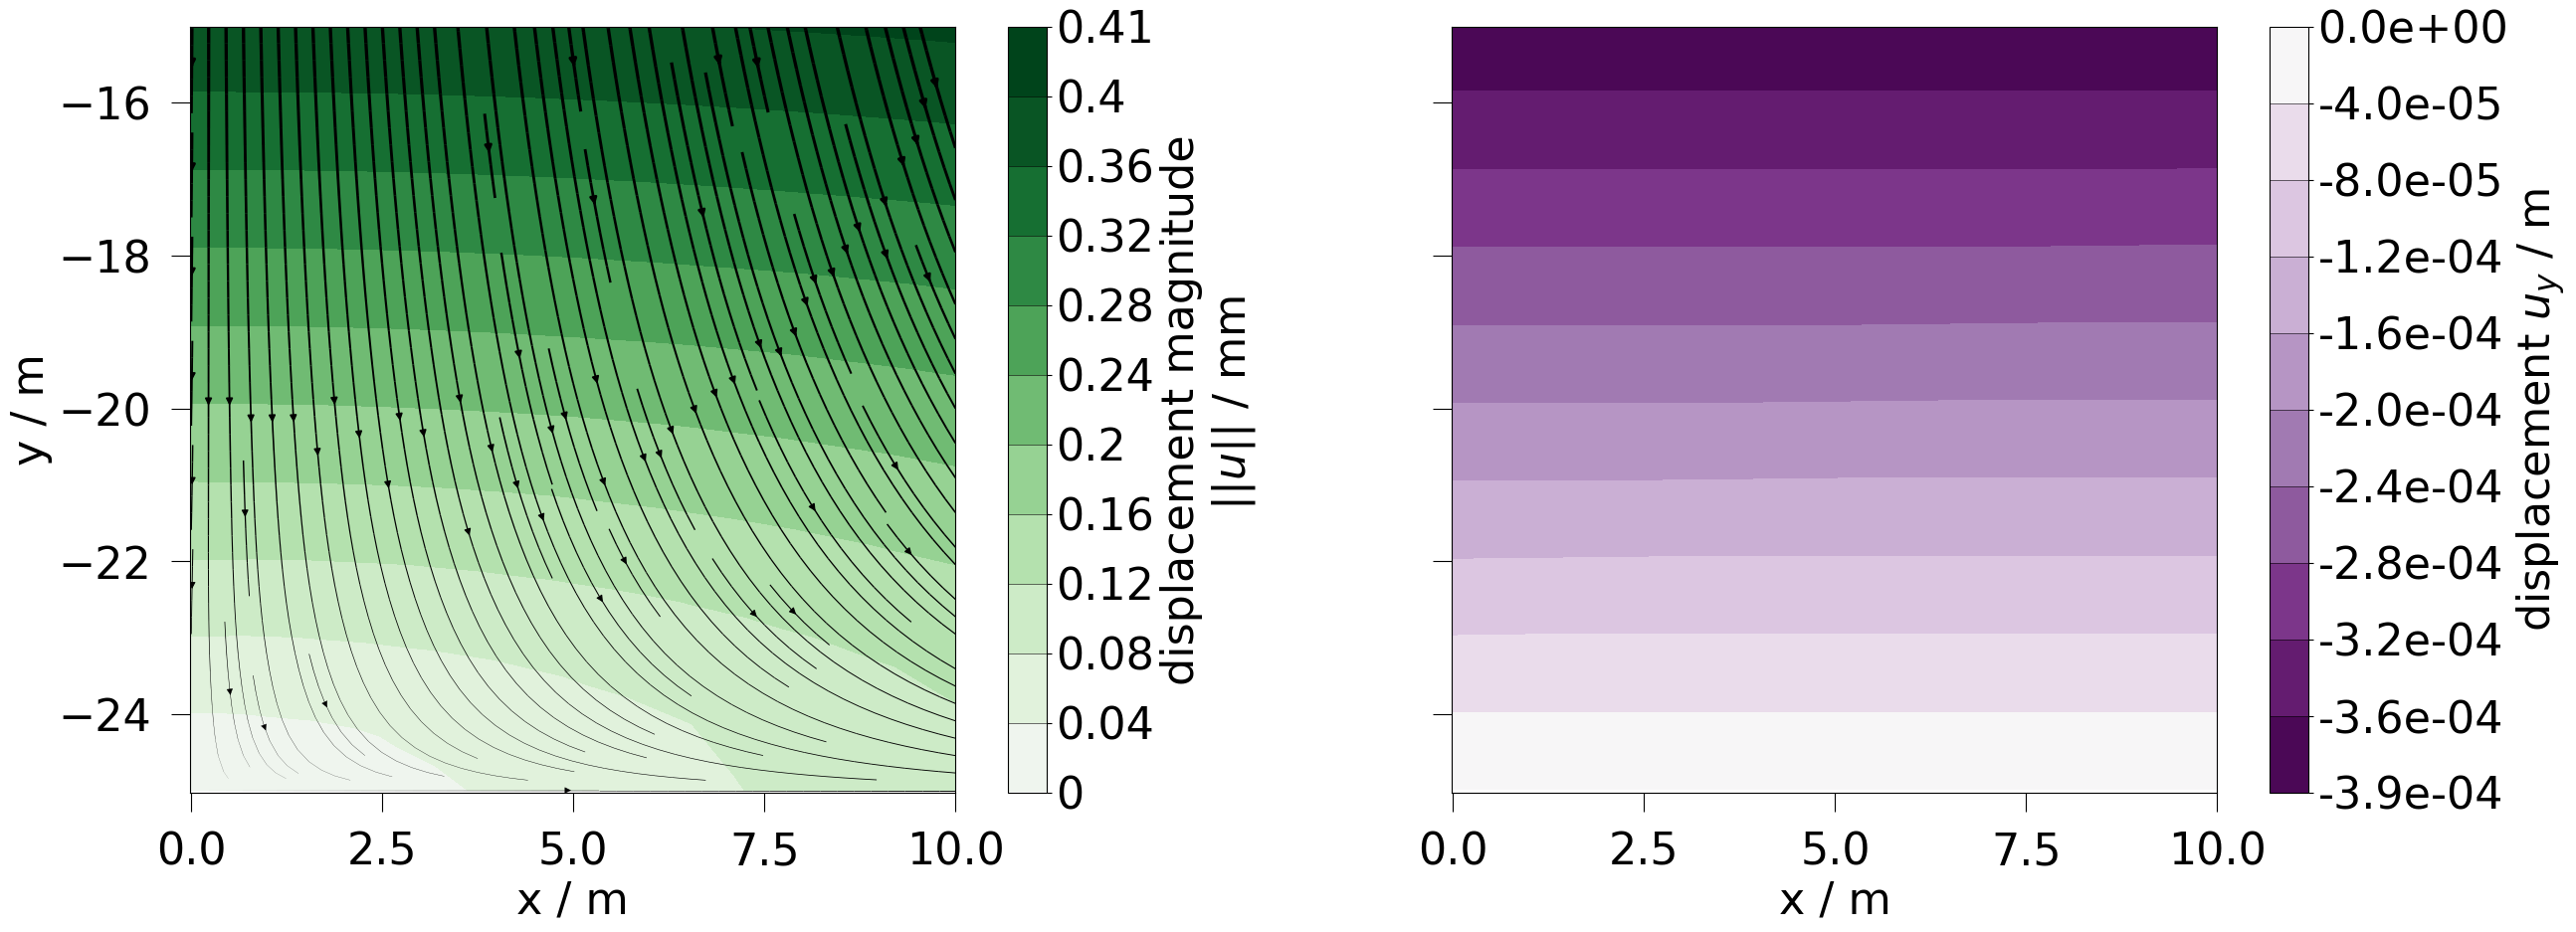

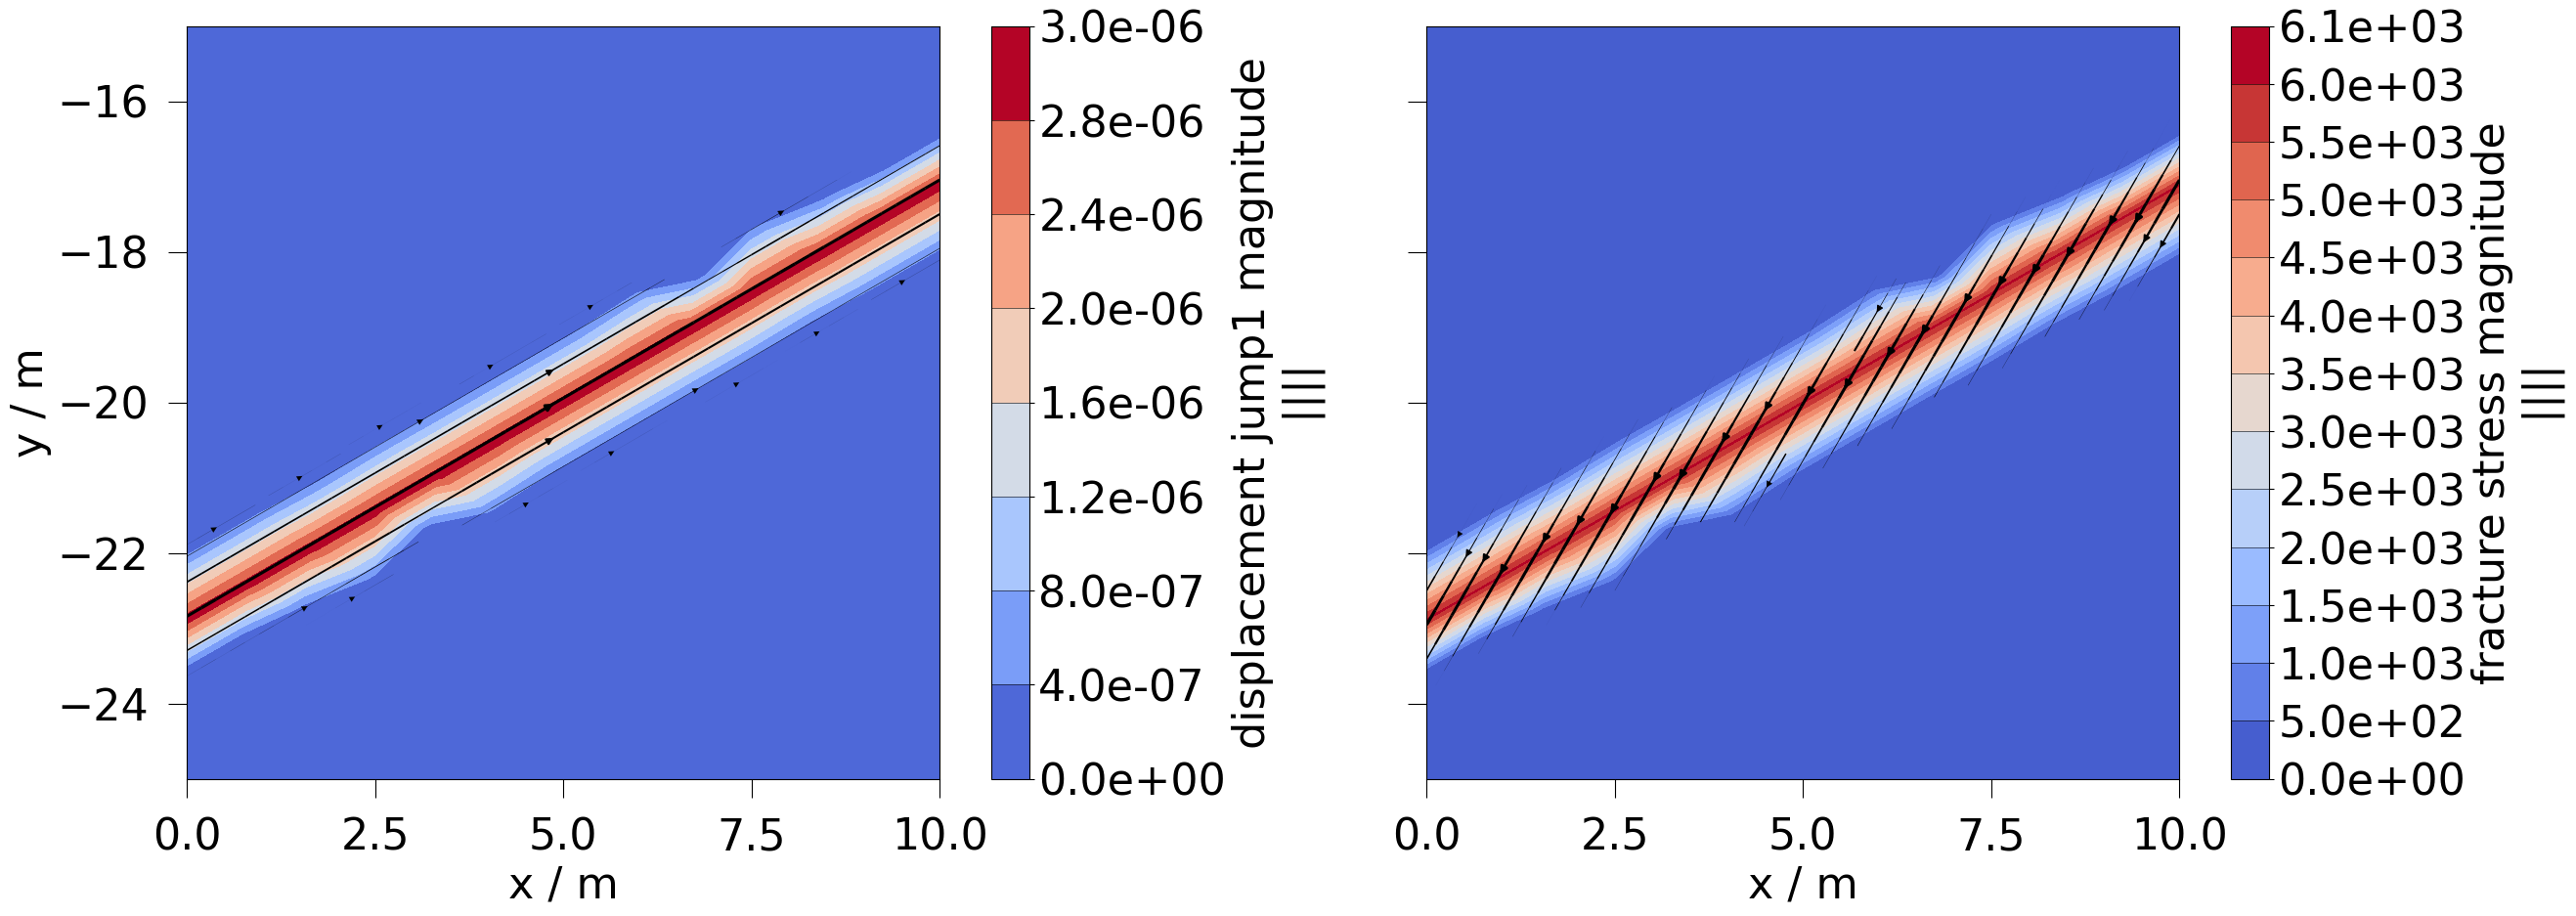

In [16]:
#plotting

fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=[30, 10], sharex=True, sharey=True)

displacement = ot.variables.displacement.replace(output_unit="mm")              
mesh_m.plot_contourf(displacement,fig1, axs[0])
mesh_m.plot_contourf(ot.variables.displacement["y"],fig1, axs[1])

fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=[30, 10], sharex=True, sharey=True)

mesh_m.plot_contourf("displacement_jump1", fig2, axs2[0])
mesh_m.plot_contourf("fracture_stress", fig2, axs2[1])


## 3D mesh

In [17]:
cube_file = MESH_DIR / "cube_3d.msh"

create_cube_mesh(
        cube_file,        
        width=10.0,
        height=10.0,
        thickness=10.0,
        mesh_size=1.0,
        center_z=-20.0  
    )

cube_meshes = ot.meshes_from_gmsh(cube_file, log=False)
for name, mesh in cube_meshes.items():
    vtu = MESH_DIR / f"cube_{name}.vtu"
    pv.save_meshio(vtu, mesh)
    print(f"Saved {vtu}")


Saved _out\mesh\cube_domain.vtu
Saved _out\mesh\cube_physical_group_points.vtu
Saved _out\mesh\cube_physical_group_edges.vtu
Saved _out\mesh\cube_physical_group_bottom.vtu
Saved _out\mesh\cube_physical_group_top.vtu
Saved _out\mesh\cube_physical_group_front.vtu
Saved _out\mesh\cube_physical_group_back.vtu
Saved _out\mesh\cube_physical_group_left.vtu
Saved _out\mesh\cube_physical_group_right.vtu
Saved _out\mesh\cube_physical_group_volume.vtu


## 3D Plot 

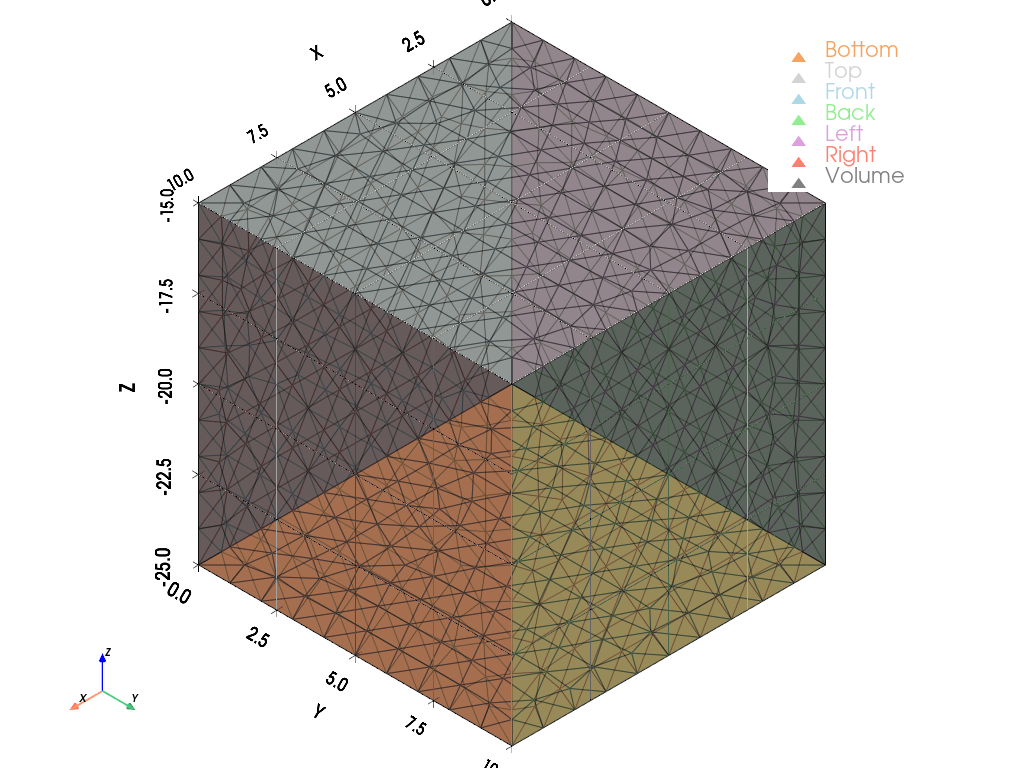

In [40]:
try:
    pv.set_jupyter_backend("static")
except Exception as e:
    print("PyVista backend not set:", e)


faces = {
    "bottom": pv.read(f"{MESH_DIR}/cube_physical_group_bottom.vtu"),
    "top":    pv.read(f"{MESH_DIR}/cube_physical_group_top.vtu"),
    "front":  pv.read(f"{MESH_DIR}/cube_physical_group_front.vtu"),
    "back":   pv.read(f"{MESH_DIR}/cube_physical_group_back.vtu"),
    "left":   pv.read(f"{MESH_DIR}/cube_physical_group_left.vtu"),
    "right":  pv.read(f"{MESH_DIR}/cube_physical_group_right.vtu"),
}
vol    = pv.read(f"{MESH_DIR}/cube_physical_group_volume.vtu")

plotter = pv.Plotter(off_screen=True)

face_colors = {
    "bottom": "sandybrown",
    "top":    "lightgray",
    "front":  "lightblue",
    "back":   "lightgreen",
    "left":   "plum",
    "right":  "salmon",
}
for name, mesh in faces.items():
    plotter.add_mesh(
        mesh,
        color=face_colors[name],
        opacity=0.7,
        show_edges=True,
        label=name.capitalize(),
    )

try:
    vol_surf = vol.extract_surface()
except AttributeError:
    vol_surf = vol
plotter.add_mesh(
    vol_surf,
    style="wireframe",
    color="gray",
    opacity=0.2,
    label="Volume",
)

plotter.show_bounds(
    grid="front",       
    location="outer",   
    all_edges=True,     
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=14
)

plotter.add_legend(bcolor="w")
plotter.show_axes()
plotter.enable_parallel_projection()
plotter.view_isometric()
plotter.show()

## 3D OGS and python plot results

In [19]:
#reor
!NodeReordering -o ./_out/mesh/cube_domain.vtu -i ./_out/mesh/cube_domain.vtu 

[2025-08-06 14:39:50.093] [ogs] [info] Reordering nodes... 
[2025-08-06 14:39:50.095] [ogs] [info] Corrected 0 elements.
[2025-08-06 14:39:50.106] [ogs] [info] VTU file written.


In [20]:
!ogs SD_init_3D.prj -m ./_out/mesh -o ./_out/

info: This is OpenGeoSys-6 version 6.5.5.
info: OGS started on 2025-08-06 14:39:50+0200.
info: Eigen use 16 threads
info: Reading project file SD_init_3D.prj.
info: readRasters ...
info: readRasters done
info: ConstantParameter: E
info: ConstantParameter: nu
info: ConstantParameter: displacement0
info: ConstantParameter: zero
info: ConstantParameter: T0
info: FunctionParameter: sigma0
info: FunctionParameter: geo_stress
info: No source terms for process variable 'displacement' found.
info: Threads used for ParallelVectorMatrixAssembler: 1. This is the default when OGS_ASM_THREADS environment variable is not set.
info: SmallDeformation process initializeSubmeshOutput().
info: Initialize processes.
info: Time step #0 started. Time: 0. Step size: 0.
info: [time] Output of timestep 0 took 0.067166 s.
info: Time step #0 took 0.0784641 s.
info: OpenGeoSys is now initialized.
info: OGS started on 2025-08-06 14:39:50+0200.
info: Solve processes.
info: Time step #1 started. Time: 10. Step size:

In [21]:
#Loading last timestep mesh results
ms_c = ot.MeshSeries(f'{OUT_DIR}/init_3d.pvd')
mesh_c = ms_c[-1]


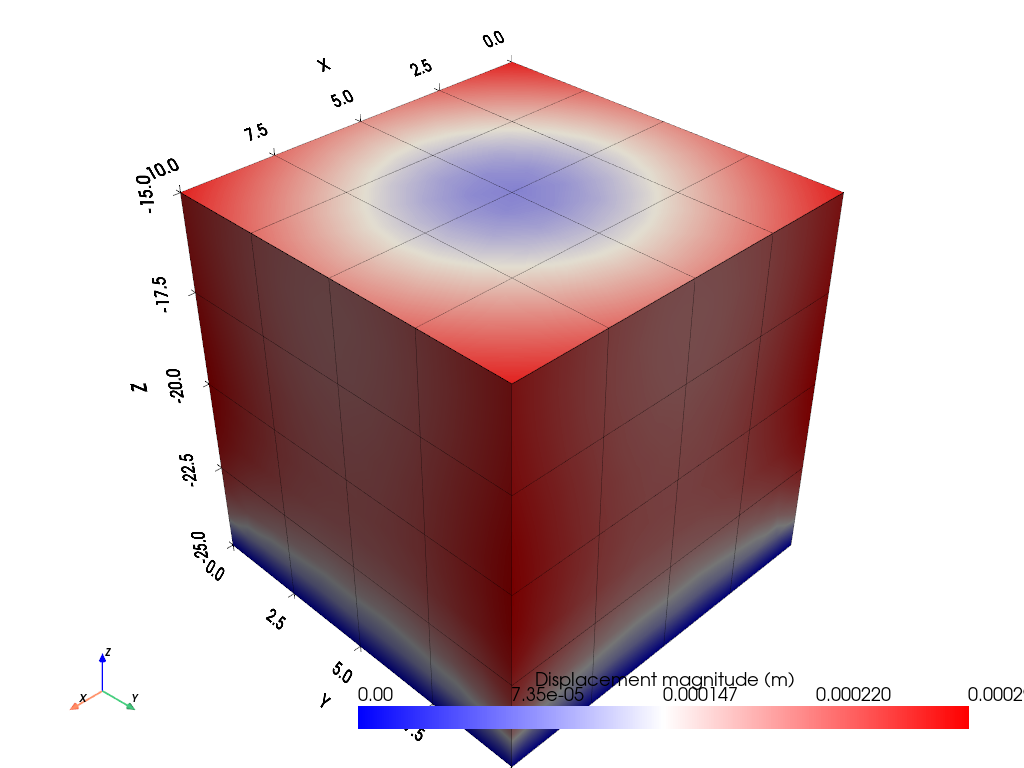

In [22]:
#Graphing displacement magnitude in a 3D isocube

# Plot the mesh with a specific color map
plotter = pv.Plotter()
plotter.add_mesh(mesh_c, scalars='displacement', cmap='bwr',scalar_bar_args={'title': 'Displacement magnitude (m)'})

plotter.show_bounds(
    grid="front",       
    location="outer",   
    all_edges=True,     
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=14
)

plotter.add_axes()
plotter.show()

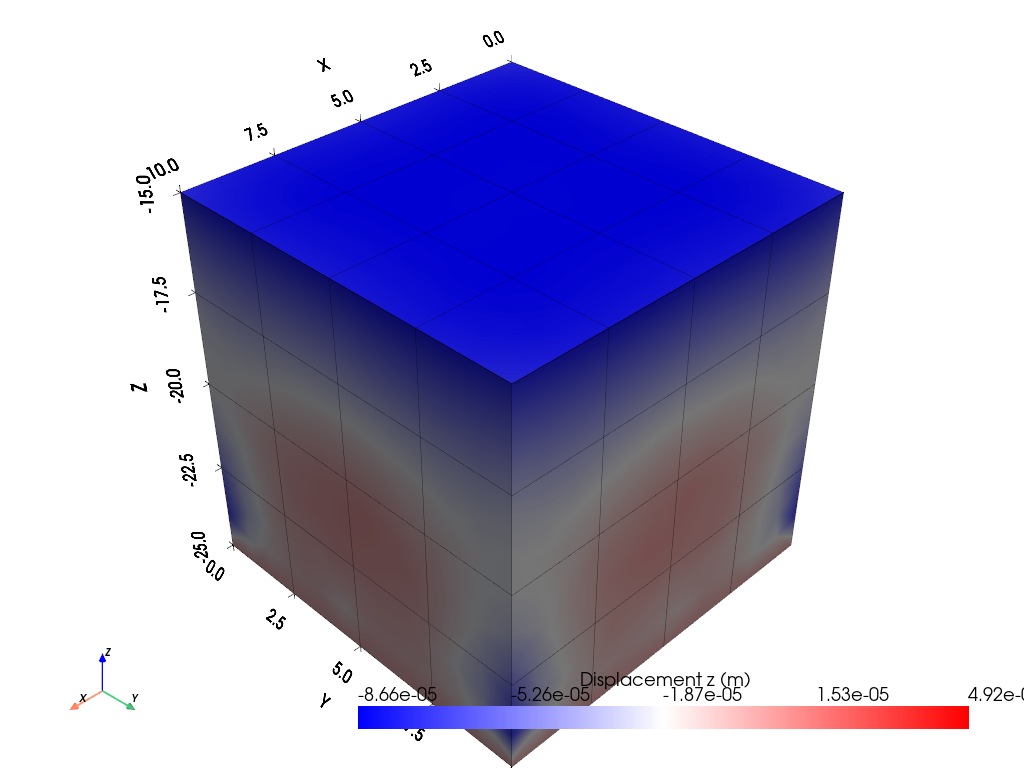

In [23]:
#Graphing displacement in z component (2) in a 3D isocube

# Plot the mesh with a specific color map
plotter = pv.Plotter()
plotter.add_mesh(mesh_c, scalars=mesh_c["displacement"][:,2], cmap='bwr',scalar_bar_args={'title': 'Displacement z (m)'})

plotter.show_bounds(
    grid="front",       
    location="outer",   
    all_edges=True,     
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=14
)

plotter.add_axes()
plotter.show()

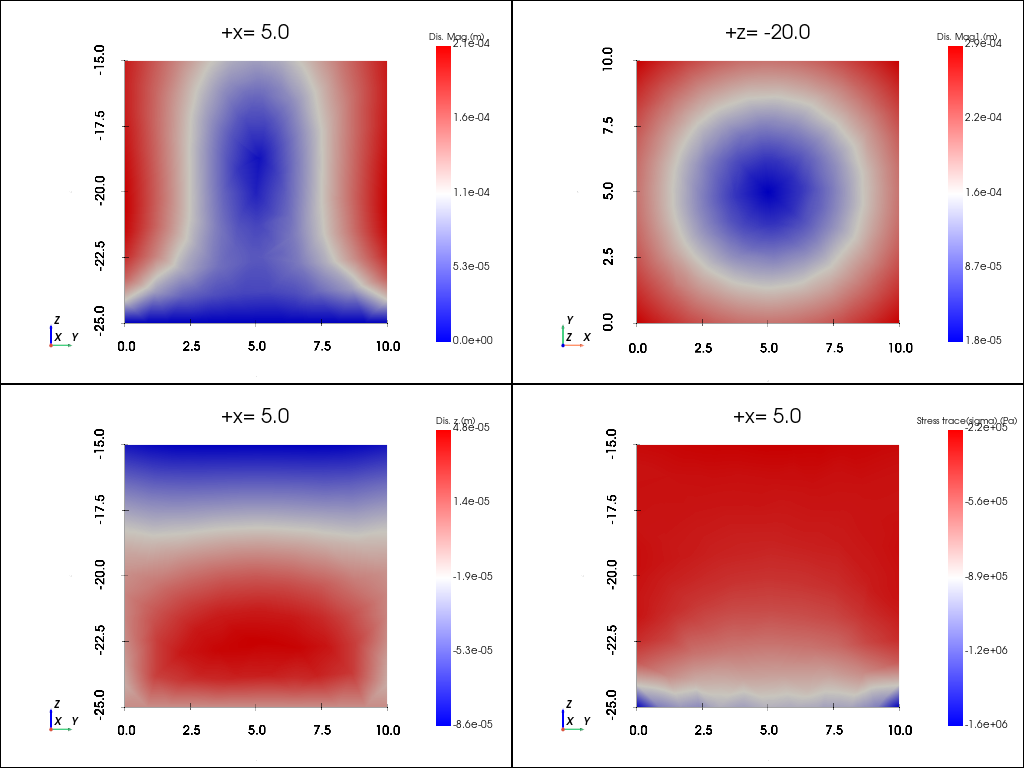

In [41]:
#Plotting slices of the cube: total displacement, displacement in z and stress trace(sigma)

#recalling dimensions
width=10.0
height=10.0
thickness=10.0
mesh_size=1.0
center_z=-20.0  

plotter = pv.Plotter(shape=(2, 2))

# Select the first subplot (row 0, column 0) Midwidth for total displacement
plotter.subplot(0, 0)

#Create a slice plane at the +x value
slice_plane_origin = [width/2, 0.0, center_z]
slice_plane_normal = [1, 0, 0]

plus_x_face = mesh_c.slice(origin=slice_plane_origin, normal=slice_plane_normal)

# Add your mesh to the plotter.
plotter.add_mesh(
    plus_x_face,
    scalars=np.linalg.norm(plus_x_face["displacement"], axis=1),
    show_edges=False,
    cmap='bwr',
    opacity=1.0,
    scalar_bar_args={'title': 'Dis. Mag.(m)','title_font_size': 9,'label_font_size': 10
                    ,'fmt': '%.1e', 'position_x': 0.85,'position_y': 0.1,"height":0.8, "vertical":True  }
)
plotter.show_bounds( 
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=10
)

plotter.add_title(f"+x= {width/2}", font_size=9)

#adjusting camera view of the plane
plotter.reset_camera()
plotter.view_yz()
plotter.add_axes()

# Select the second subplot (row 0, column 1) 
plotter.subplot(0, 1)

#Create a slice plane at the +z value
slice_plane_origin = [0.0, 0.0, center_z]
slice_plane_normal = [0, 0, 1]

plus_z_face = mesh_c.slice(origin=slice_plane_origin, normal=slice_plane_normal)

# Add your mesh to the plotter.
plotter.add_mesh(
    plus_z_face,
    scalars=np.linalg.norm(plus_z_face["displacement"], axis=1),
    show_edges=False,
    cmap='bwr',
    opacity=1.0,
    scalar_bar_args={'title': 'Dis. Mag1.(m)','title_font_size': 9,'label_font_size': 10
                ,'fmt': '%.1e', 'position_x': 0.85,'position_y': 0.1,"height":0.8, "vertical":True  } #title of scalar bar should be different to appear 
)
plotter.show_bounds( 
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=10
)

# Set a title for the plot
plotter.add_title(f"+z= {center_z}", font_size=9)

#adjusting camera view of the plane
plotter.reset_camera()
plotter.view_xy()
plotter.add_axes()



# Select the third subplot (row 1, column 0) 
plotter.subplot(1, 0)

#Create a slice plane at the +x value
slice_plane_origin = [width/2, 0.0, center_z]
slice_plane_normal = [1, 0, 0]

plus_x_face = mesh_c.slice(origin=slice_plane_origin, normal=slice_plane_normal)

# Add your mesh to the plotter.
plotter.add_mesh(
    plus_x_face,
    scalars=plus_x_face["displacement"][:,2],
    show_edges=False,
    cmap='bwr',
    opacity=1.0,
    scalar_bar_args={'title': 'Dis. z.(m)','title_font_size': 9,'label_font_size': 10
                ,'fmt': '%.1e', 'position_x': 0.85,'position_y': 0.1,"height":0.8, "vertical":True  } #title of scalar bar should be different to appear 
)
plotter.show_bounds( 
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=10
)

# Set a title for the plot
plotter.add_title(f"+x= {width/2}", font_size=9)

#adjusting camera view of the plane
plotter.reset_camera()
plotter.view_yz()
plotter.add_axes()



# Select the four subplot (row 1, column 1) 
plotter.subplot(1, 1)

#Create a slice plane at the +x value
slice_plane_origin = [width/2, 0.0, center_z]
slice_plane_normal = [1, 0, 0]

plus_x_face = mesh_c.slice(origin=slice_plane_origin, normal=slice_plane_normal)

# Add your mesh to the plotter.
plotter.add_mesh(
    plus_x_face,
    scalars=plus_x_face["sigma"][:,0]+plus_x_face["sigma"][:,1]+plus_x_face["sigma"][:,2],
    show_edges=False,
    cmap='bwr',
    opacity=1.0,
    scalar_bar_args={'title': 'Stress trace(sigma) (Pa)','title_font_size': 9,'label_font_size': 10
                ,'fmt': '%.1e', 'position_x': 0.85,'position_y': 0.1,"height":0.8, "vertical":True  } #title of scalar bar should be different to appear 
)
plotter.show_bounds( 
    ticks="both",       
    xtitle="X",        
    ytitle="Y",         
    ztitle="Z",         
    font_size=10
)

# Set a title for the plot
plotter.add_title(f"+x= {width/2}", font_size=9)

#adjusting camera view of the plane
plotter.reset_camera()
plotter.view_yz()
plotter.add_axes()

plotter.show()


0.45.3
